<h1 style = "color: black; background-color: yellow; font-family: Romans;"> Spam Message Detection </h1>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,Category,Message
3645,ham,* Thought I didn't see you.
4164,ham,I told that am coming on wednesday.
5,spam,FreeMsg Hey there darling it's been 3 week's n...
2537,ham,You do what all you like
2590,spam,Join the UK's horniest Dogging service and u c...


In [4]:
df.shape

(5572, 2)

### Outline

 1. Data cleaning
 2. EDA (Exploratory Data Analysis)
 3. Text Preprocessing
 4. Model building
 5. Evaluation
 6. Improvement
 7. Website
 8. Deploy

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# renaming the cols

df.rename(columns={'Category':'target'},inplace=True)
df.sample(5)

,target,Message
5513,ham,Yes. Please leave at &lt;#&gt; . So that at ...
2082,ham,I'm aight. Wat's happening on your side.
2734,ham,Do ü noe if ben is going?
233,ham,"Sorry battery died, yeah I'm here"
3204,ham,Haha... Yup hopefully we will lose a few kg b...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
df.isnull().sum()

target     0
Message    0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

415

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5157, 2)

## 2.EDA

In [15]:
df.head()

,target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


* In Exploratory data analysis (EDA) we need to explore the data, so here we check how many messages are spam or ham. 

In [16]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

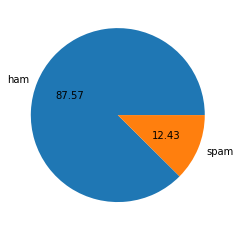

In [17]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [34]:
# Data is imbalanced

In [18]:
import nltk

In [ ]:
#!pip install nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['Message'].apply(len)

In [22]:
df.head()

,target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#spam

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

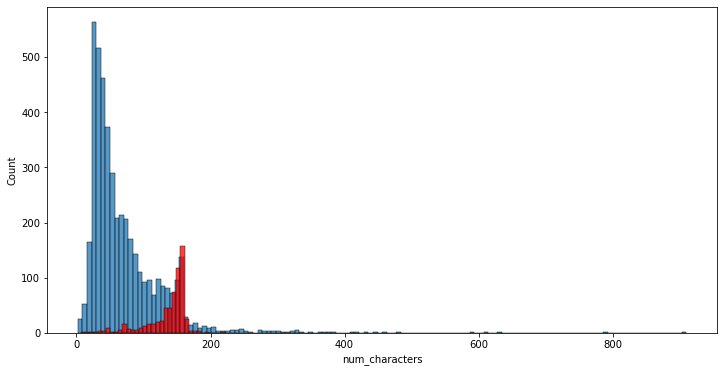

In [31]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

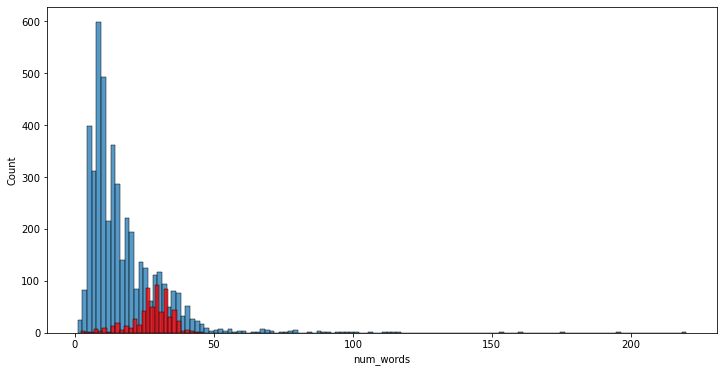

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

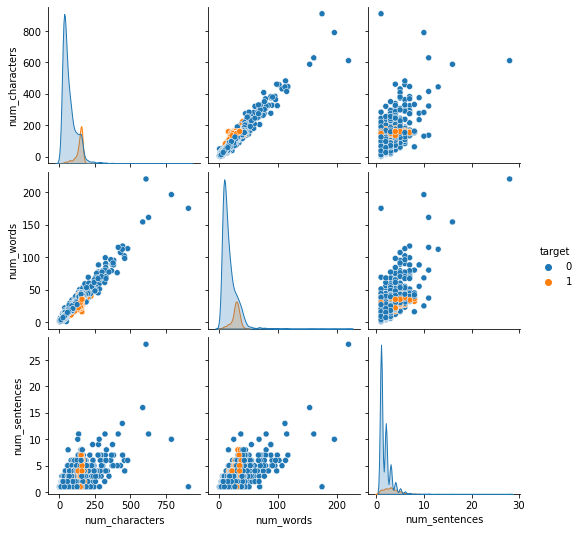

In [33]:
sns.pairplot(df,hue='target')

In [34]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.374409,0.256038,0.281055
num_characters,0.374409,1.000000,0.966164,0.636615
num_words,0.256038,0.966164,1.000000,0.683371
num_sentences,0.281055,0.636615,0.683371,1.000000


<AxesSubplot:>

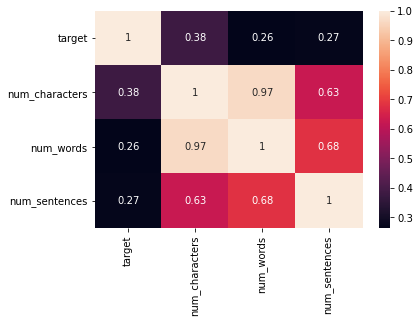

In [89]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [38]:
from nltk.corpus import stopwords

stopwords.words('english')[:9]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

In [39]:
import string 

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

    *  isalnum()   --> is aplha numeric method returns True if all the characters are alphanumeric, meaning alphabet letter (a-z) and numbers (0-9).

    * Example of characters that are not alphanumeric: (space)!#%&? --> these are special characters

In [46]:
# Check if all the characters in the text is alphanumeric:

txt1 = "Company12&$+\\promotion"
txt2 = "Company12 promotion"
txt3 = "Company12promotion"

x = txt.isalnum()
y = txt2.isalnum()
z = txt3.isalnum()

print(x)
print(y)
print(z)

False
False
True


### Stemming

* is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

#### Example: 

* A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word, “chocolate”. 
* Dance , Dancing , Dancer will be reduced to the root word Dance.
* program", "programs", "programmer", "programming", "programmers  will be reduced to the root word program.
* waited, waits , waiting  will be reduced to the root word wait.


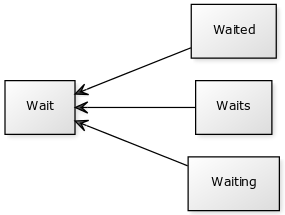

In [51]:
from nltk.stem import PorterStemmer
  
ps = PorterStemmer()
  
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

print(ps.stem('loving'))      # what is the stem of word loving ? 
print(ps.stem('Developer'))
print(ps.stem('Walking'))
    
for w in words:
    print(w, " : ", ps.stem(w) )

love
develop
walk
program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


### transform_text( )

- This method is used to transform the text into lower case and if there are any special characters or stop words then it'll remove them.
- At the end it will return a list of aplha numeric characters.

In [52]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text: 
        if i.isalnum():    # only those words will be appended to the list which are aplha numeric not special characters like $ or %%  ), or (
            y.append(i)
    
    text = y[:]   # y should be updated every time so we need to store it in text and then clean it.
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [56]:
transform_text(" Developers think that %%  Data science will be come the trend $  of + the market for many years and many programmers.")

'develop think data scienc come trend market mani year mani programm'

In [58]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [59]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [60]:
df.head()

,target,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word Cloud

- is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites. 

In [96]:
from wordcloud import WordCloud

# while defining the word-cloud object we set the collocations parameter to false to avoid duplicates in the final plot.

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white' , collocations = False) 



In [97]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ") )   # str.cat --> we concat the string on top of space

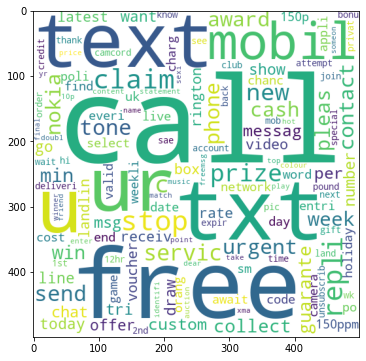

In [98]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [99]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

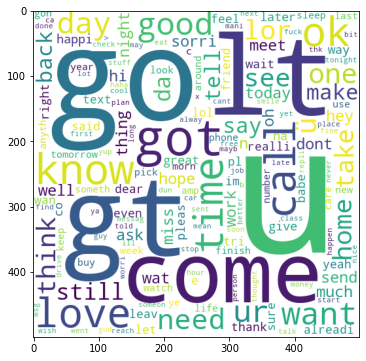

In [100]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [67]:
df.head()

,target,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
df[df['target'] == 1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 641, dtype: object

In [69]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [74]:
spam_corpus[:9]

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final']

In [70]:
len(spam_corpus)

9781

In [79]:
from collections import Counter

pd.DataFrame(Counter(spam_corpus).most_common(30) )

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


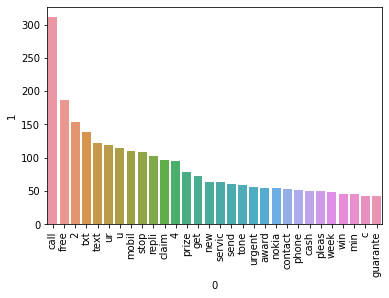

In [80]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [82]:
len(ham_corpus)

35930

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


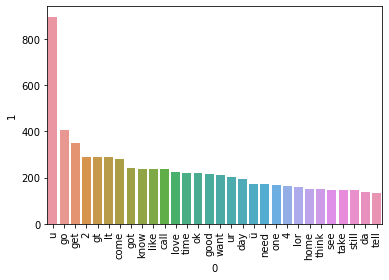

In [83]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [285]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [161]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [162]:
X = tfidf.fit_transform(df['transformed_text']).toarray()   # we can use both tfidf or countVectorizer

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [164]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [165]:
X.shape

(5157, 3000)

In [166]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### For textual data the best model to use  is Naive Bayes.

In [169]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [170]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [171]:
gnb.fit(X_train,y_train)

y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8643410852713178
[[781 124]
 [ 16 111]]
0.4723404255319149


In [172]:
mnb.fit(X_train,y_train)

y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9815891472868217
[[903   2]
 [ 17 110]]
0.9821428571428571


In [173]:
bnb.fit(X_train,y_train)

y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [174]:
#!pip install xgboost

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [176]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [177]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
   # 'xgb':xgb
}

In [178]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [179]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9670542635658915, 0.9345794392523364)

In [180]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9670542635658915
Precision -  0.9345794392523364
For  KN
Accuracy -  0.9108527131782945
Precision -  1.0
For  NB
Accuracy -  0.9815891472868217
Precision -  0.9821428571428571
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9641472868217055
Precision -  0.9591836734693877
For  RF
Accuracy -  0.9738372093023255
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941


In [181]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [182]:
performance_df     # NB , RF , ETC, and SVC are the good models we can choose

,Algorithm,Accuracy,Precision
1,KN,0.910853,1.000000
5,RF,0.973837,1.000000
8,ETC,0.977713,0.990566
2,NB,0.981589,0.982143
9,GBDT,0.955426,0.976471
4,LR,0.964147,0.959184
6,AdaBoost,0.966085,0.942308
0,SVC,0.967054,0.934579
7,BgC,0.961240,0.891892
3,DT,0.936047,0.821053


In [183]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [184]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.910853
1,RF,Accuracy,0.973837
2,ETC,Accuracy,0.977713
3,NB,Accuracy,0.981589
4,GBDT,Accuracy,0.955426
5,LR,Accuracy,0.964147
6,AdaBoost,Accuracy,0.966085
7,SVC,Accuracy,0.967054
8,BgC,Accuracy,0.961240
9,DT,Accuracy,0.936047


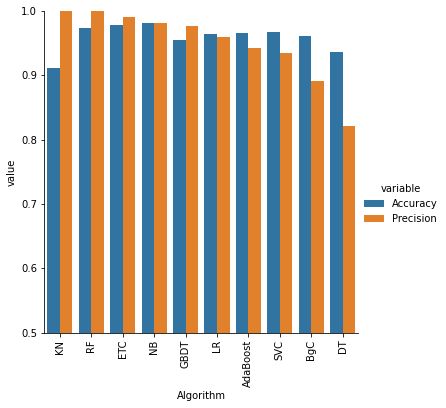

In [185]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [186]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [187]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [188]:
performance_df.merge(temp_df, on = "Algorithm")     # checking the accuracy if max features = 3000 

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.910853,1.000000,0.910853,1.000000
1,RF,0.973837,1.000000,0.973837,1.000000
2,ETC,0.977713,0.990566,0.977713,0.990566
3,NB,0.981589,0.982143,0.981589,0.982143
4,GBDT,0.955426,0.976471,0.955426,0.976471
5,LR,0.964147,0.959184,0.964147,0.959184
6,AdaBoost,0.966085,0.942308,0.966085,0.942308
7,SVC,0.967054,0.934579,0.967054,0.934579
8,BgC,0.961240,0.891892,0.961240,0.891892
9,DT,0.936047,0.821053,0.936047,0.821053


In [189]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [190]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [191]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [192]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [193]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.910853,1.000000,0.910853,1.000000,0.910853,1.000000,0.910853,1.000000
1,RF,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000
2,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
3,NB,0.981589,0.982143,0.981589,0.982143,0.981589,0.982143,0.981589,0.982143
4,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
5,LR,0.964147,0.959184,0.964147,0.959184,0.964147,0.959184,0.964147,0.959184
6,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
7,SVC,0.967054,0.934579,0.967054,0.934579,0.967054,0.934579,0.967054,0.934579
8,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892
9,DT,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'xgboost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\KIIT\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\KIIT\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\KIIT\anaconda3\lib\socket.

###  Voting classifier model 

- combines multiple different models (i.e., sub-estimators) into a single model, which is (ideally) stronger than any of the individual models alone.

In [194]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [195]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [196]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [197]:
y_pred = voting.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806201550387597
Precision 0.9734513274336283


In [198]:
# Applying stacking

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [199]:
from sklearn.ensemble import StackingClassifier

In [200]:
clf = StackingClassifier(estimators=estimators, final_estimator = final_estimator)

In [201]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9844961240310077
Precision 0.9826086956521739


* We have tried differnet models and approaches, but the accuracy didn't change a lot, so we come into a coclusion that it would be better if we  use Multinomial Naive Bayes model.

In [203]:
import pickle

pickle.dump(tfidf,open('vectorizer3.pkl','wb'))
pickle.dump(mnb,open('model3.pkl','wb'))